In [0]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
from keras.datasets import imdb
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [0]:
imdb_data = pd.read_csv('./IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [0]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review       50000 non-null object
sentiment    50000 non-null object
dtypes: object(2)
memory usage: 781.3+ KB


In [0]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


See the average number of words of each sample

Text(0.5, 1.0, 'review length distribution')

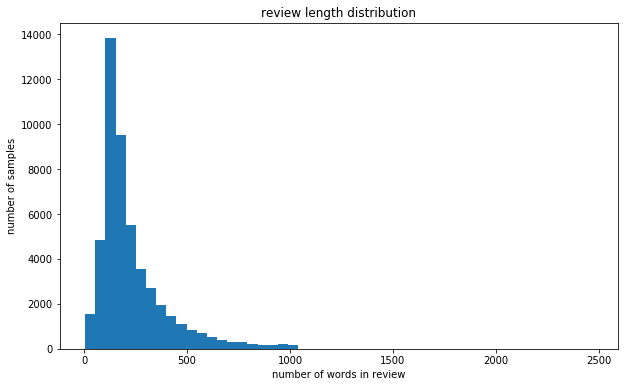

In [0]:
plt.figure(figsize=(10,6))
plt.hist([len(sample.split()) for sample in list(imdb_data['review']) ], 50)
plt.xlabel('number of words in review')
plt.ylabel('number of samples')
plt.title("review length distribution")


Text(0.5, 1.0, 'sentiment distribution')

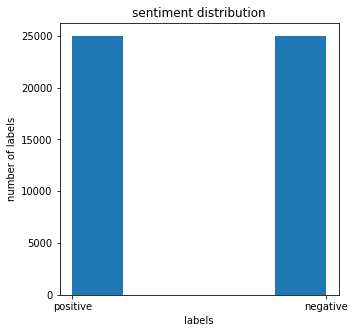

In [0]:
plt.figure(figsize=(5,5))
plt.hist([list(imdb_data['sentiment']) ], 5)
plt.xlabel('labels')
plt.ylabel('number of labels')
plt.title("sentiment distribution")

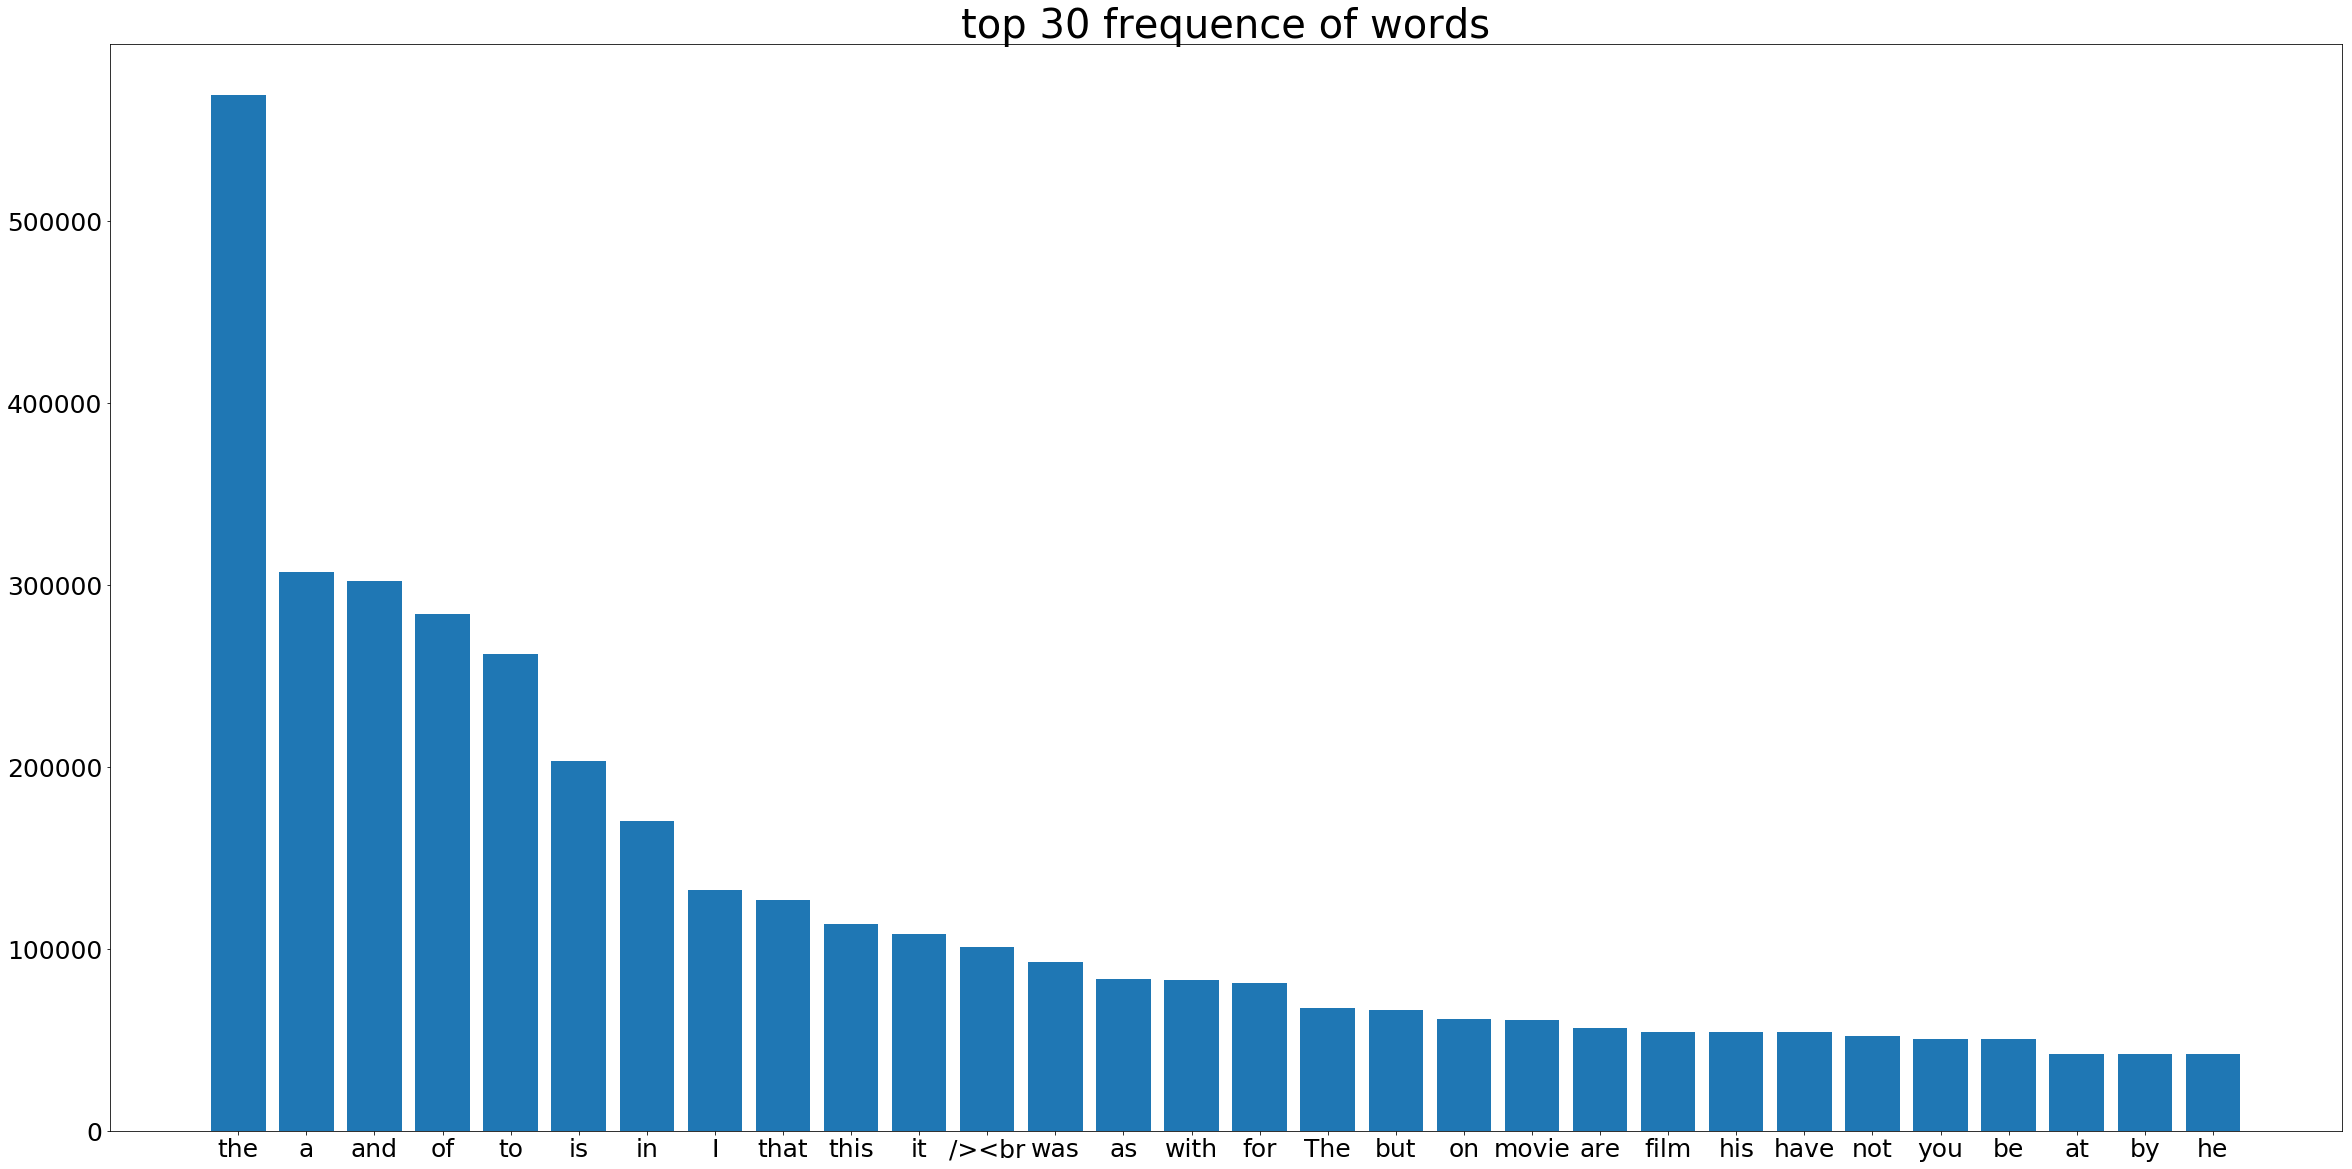

In [0]:
dict_w = {}
for line in imdb_data['review']:
    for word in line.split():
        if word in dict_w:
            dict_w[word] += 1
        else:
            dict_w[word] = 1
lists = sorted(dict_w.items(), key=lambda kv: kv[1], reverse=True) # sorted by value, return a list of tuples
x, y = zip(*lists[:30]) # unpack a list of pairs into two tuples, choose top 30
plt.figure(figsize=(40,20))
plt.bar(x, y)
plt.tick_params(axis='both', labelsize=25)
plt.title('top 30 frequence of words', size=40)
plt.show()


Preliminary Preprocessing and Algorithms

In [0]:
import re
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
import string
from nltk.stem.snowball import SnowballStemmer

imdb_data = pd.read_csv('./IMDB Dataset.csv')

def clean_review(text):
    text = re.sub('<[^<]+?>', ' ', text)
    text = text.replace('\\"', '')
    text = text.replace('"', '')
    return text

imdb_data['cleaned_review'] = imdb_data['review'].apply(clean_review)
print(imdb_data.shape)
imdb_data.head(10)



(50000, 3)


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming t...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei's Love in the Time of Money is a...
5,"Probably my all-time favorite movie, a story o...",positive,"Probably my all-time favorite movie, a story o..."
6,I sure would like to see a resurrection of a u...,positive,I sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i...",negative,"This show was an amazing, fresh & innovative i..."
8,Encouraged by the positive comments about this...,negative,Encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...,positive,If you like original gut wrenching laughter yo...


In [0]:
nltk.download('stopwords')
from nltk.corpus import stopwords 
stop_words = stopwords
def clean_review(text):
    text = re.sub('<[^<]+?>', ' ', text)
    text = text.replace('\\"', '')
    text = text.replace('"', '')
    return text

def remove_stop_words(text):
  res = text.split(' ')
  final_res = []
  stop_words = set(stopwords.words('english'))
  for word in res:
    if word in stop_words:
      continue
    else:
      final_res.append(word)
  return " ".join(final_res)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/qianqu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
import re
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
import string
from nltk.stem.snowball import SnowballStemmer
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score





In [0]:
imdb_data = pd.read_csv('./IMDB Dataset.csv')
imdb_data['cleaned_review'] = imdb_data['review'].apply(clean_review)
imdb_data['cleaned_review'] = imdb_data['cleaned_review'].apply(remove_stop_words)
print(imdb_data.shape)
imdb_data.head(10)

(50000, 3)


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming t...
2,I thought this was a wonderful way to spend ti...,positive,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,Basically there's family little boy (Jake) thi...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei's Love Time Money visually stunn...
5,"Probably my all-time favorite movie, a story o...",positive,"Probably all-time favorite movie, story selfle..."
6,I sure would like to see a resurrection of a u...,positive,I sure would like see resurrection dated Seahu...
7,"This show was an amazing, fresh & innovative i...",negative,"This show amazing, fresh & innovative idea 70'..."
8,Encouraged by the positive comments about this...,negative,Encouraged positive comments film I looking fo...
9,If you like original gut wrenching laughter yo...,positive,If like original gut wrenching laughter like m...


# Preprocessing

split to train and test

In [0]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_label=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_label.shape)

X_org_train, X_org_test, y_train, y_test = train_test_split(imdb_data['cleaned_review'], sentiment_label, test_size=0.2)

(50000, 1)


In [0]:
X_org_train.shape

(40000,)

In [0]:
def print_metrics(pred, label):
    print("accracy: ", accuracy_score(label, pred))
    print("precision: ", precision_score(label, pred))
    print("recal: ", recall_score(label, pred))
    print("f1_score: ", f1_score(label, pred))
    print("AUC: ", roc_auc_score(label, pred))

## BOW

In [0]:
vectorizer = CountVectorizer(lowercase=True)
vectorizer.fit(X_org_train)
X_train = vectorizer.transform(X_org_train)
X_test = vectorizer.transform(X_org_test)

In [0]:
X_train.shape

(40000, 92911)

### Logistic Regression

In [0]:
lr = LogisticRegression(C=0.1)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
#lr_pred
#print(accuracy_score(y_test, lr.predict(X_test)))
print_metrics(lr_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accracy:  0.8916
precision:  0.8851684065392948
recal:  0.8996996996996997
f1_score:  0.892374900714853
AUC:  0.8916080916080915


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf_forest = RandomForestClassifier(n_estimators=500, oob_score=False,max_depth=50)
clf_forest.set_params(max_features=5)
clf_forest= clf_forest.fit(X_train, y_train)
clf_forest_pred = clf_forest.predict(X_test)
#print(accuracy_score(y_test,clf_forest.predict(X_test)))
print_metrics(clf_forest_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


accracy:  0.8293
precision:  0.8435018804847472
recal:  0.8082082082082082
f1_score:  0.825477967487987
AUC:  0.8292789292789292


### Naive Bayes

In [0]:
clf_NB = MultinomialNB()
clf_NB.fit(X_train,y_train)
clf_NB_pred = clf_NB.predict(X_test)
#print(accuracy_score(clf.predict(X_test),y_test))
print_metrics(clf_NB_pred, y_test)

accracy:  0.858
precision:  0.8768711785789585
recal:  0.8326326326326327
f1_score:  0.8541795029780244
AUC:  0.857974657974658


/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(X_train,y_train)
neigh_pred = neigh.predict(X_test)
#print(accuracy_score(neigh.predict(X_test),y_test))
print_metrics(neigh_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


accracy:  0.7244
precision:  0.7180985778297292
recal:  0.7379379379379379
f1_score:  0.7278830963665086
AUC:  0.7244135244135245


### Word Cloud

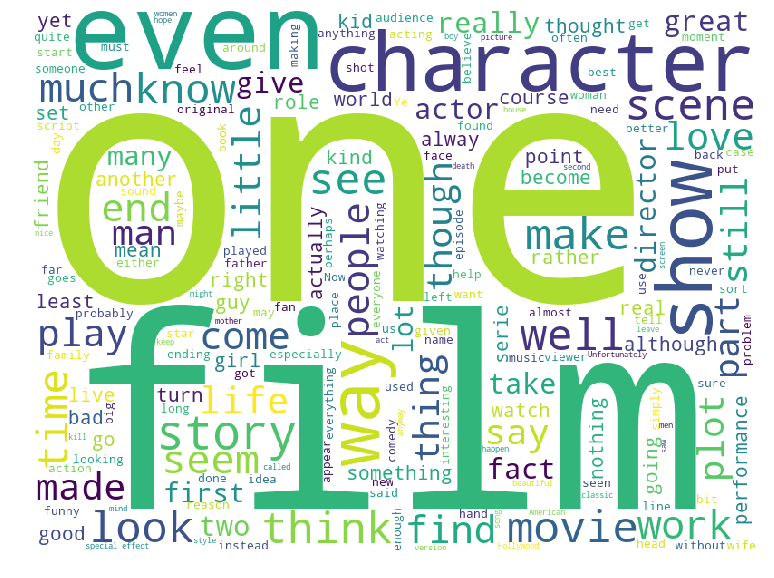

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

cloud(' '.join(imdb_data['cleaned_review']))


## Lexicon based

### tokenizer and get lexicon feature

In [0]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
total_reviews = imdb_data['cleaned_review']
tokenizer.fit_on_texts(total_reviews)

X_train_tokens = tokenizer.texts_to_sequences(X_org_train)
X_test_tokens = tokenizer.texts_to_sequences(X_org_test)

In [0]:
vocab_size = len(tokenizer.word_index) + 1
lexiconscore = np.zeros(vocab_size)

In [0]:
X_train_tokens[0][2]

19

Score of a word could be the number of positive reviews it has appeared minus the number of negative reviews it has appeared in.

if the sum of scores in a review is negative, then we predict his review as negative sentiment.
else we predict it as positive sentiment.

In [0]:
from copy import deepcopy
class LexiconVectorizer():
    def __init__(self, lexiconscore, X):
        self.lexiconscore = lexiconscore
        
        #self.newmatrix = deepcopy(X)
    
    def fit(self, X, y):
        for index, line in enumerate(X):
            for word in line:
                if y[index] == 1:
                    self.lexiconscore[word]+=1
                else:
                    self.lexiconscore[word]-=1
        return self
    
    def transform(self, X):
        newmatrix = deepcopy(X)
        for i in range(len(X)):
            for j in range(len(X[i])):
                newmatrix[i][j] = self.lexiconscore[X[i][j]]
        return newmatrix

In [0]:
lexiconvectorizer = LexiconVectorizer(lexiconscore, X_train_tokens)
lexiconvectorizer.fit(X_train_tokens, y_train)
X_lexicon_train = lexiconvectorizer.transform(X_train_tokens)
X_lexicon_test = lexiconvectorizer.transform(X_test_tokens)


In [0]:
lexicon_pred = [1 if sum(X)>0 else 0 for X in X_lexicon_test]

In [0]:
print_metrics(lexicon_pred, y_test)

accracy:  0.6171
precision:  0.8677839851024208
recal:  0.2788193059433586
f1_score:  0.4220377358490566
AUC:  0.6180498455107888


## TF-IDF

In [0]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,2))
#transformed train reviews
tv.fit(X_org_train)
X_tfidf_train = tv.transform(X_org_train)
#transformed test reviews
X_tfidf_test = tv.transform(X_org_test)
print('Tfidf_train:',X_tfidf_train.shape)
print('Tfidf_test:',X_tfidf_test.shape)

Tfidf_train: (40000, 2183311)
Tfidf_test: (10000, 2183311)


### Logistical Regression

In [0]:
lr = LogisticRegression(C=1)
lr.fit(X_tfidf_train, y_train)
lr_pred = lr.predict(X_tfidf_test)
#lr_pred
#print(accuracy_score(y_test, lr.predict(X_test)))
print_metrics(lr_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accracy:  0.6996
precision:  0.7220655239748318
recal:  0.658879429815878
f1_score:  0.6890269151138715
AUC:  0.7000196300423096


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf_forest = RandomForestClassifier(n_estimators=300, oob_score=False, max_depth=100)
clf_forest.set_params(max_features=50)
clf_forest= clf_forest.fit(X_tfidf_train, y_train)
clf_forest_pred = clf_forest.predict(X_tfidf_test)
#print(accuracy_score(y_test,clf_forest.predict(X_test)))
print_metrics(clf_forest_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


accracy:  0.4989
precision:  0.7702702702702703
recal:  0.011284894080380123
f1_score:  0.022243902439024393
AUC:  0.5039249283495454


### Naive Bayes

In [0]:
clf_NB = MultinomialNB()
clf_NB.fit(X_tfidf_train,y_train)
clf_NB_pred = clf_NB.predict(X_tfidf_test)
#print(accuracy_score(clf.predict(X_test),y_test))
print_metrics(clf_NB_pred, y_test)

accracy:  0.7013
precision:  0.7182741116751269
recal:  0.6723421104731736
f1_score:  0.6945495449432457
AUC:  0.7015984142990237


/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_tfidf_train,y_train)
neigh_pred = neigh.predict(X_tfidf_test)
#print(accuracy_score(neigh.predict(X_test),y_test))
print_metrics(neigh_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


accracy:  0.4962
precision:  0.5206349206349207
recal:  0.03246881805583053
f1_score:  0.06112560566530003
AUC:  0.5009788018345429


## Word Embedding - Word2Vector

### tokenizer and get embedding matrix

In [0]:
import gensim
EMBED_DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=imdb_data['cleaned_review'],size=EMBED_DIM,window=5,workers=4,min_count=1)

tokenizer = Tokenizer()
total_reviews = imdb_data['cleaned_review']
tokenizer.fit_on_texts(total_reviews)

X_train_tokens = tokenizer.texts_to_sequences(X_org_train)
X_test_tokens = tokenizer.texts_to_sequences(X_org_test)
vocab_size = len(tokenizer.word_index) + 1
embedding_weights = np.zeros((vocab_size, EMBED_DIM))
for word, index in tokenizer.word_index.items():
    #embedding_vector = word2vec.get(word)
    try:
        embedding_weights[index] = w2v_model.wv.get_vector(word)
    except:
        pass 


### Mean embedding 

now we can convert each word to an vector. so for a review(a sample in training set), we can average the vectors of the words to get the representation for that review.

In [0]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        #self.dim = len(word2vec.itervalues().next())
        self.dim = self.word2vec.shape[1]
        self.vocab_size = self.word2vec.shape[0]

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in range(self.vocab_size)]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])




In [0]:
meanEmbeddingV = MeanEmbeddingVectorizer(embedding_weights)

X_w2v_train = meanEmbeddingV.transform(X_train_tokens)
#transformed test reviews
X_w2v_test = meanEmbeddingV.transform(X_test_tokens)
print('Word2Vector_train:',X_w2v_train.shape)
print('Word2Vector_test:',X_w2v_test.shape)


Word2Vector_train: (40000, 100)
Word2Vector_test: (10000, 100)


In [0]:
X_w2v_train[0]


array([ 0.0104273 , -0.00203983, -0.05608568,  0.03758859,  0.00908601,
        0.00039188, -0.01390308,  0.00887141,  0.04758678, -0.00113338,
        0.00813701,  0.03691166,  0.04582194, -0.01753682, -0.03011815,
       -0.0158201 , -0.00869058, -0.01778313, -0.00966533, -0.01465392,
       -0.01988024,  0.02232124, -0.00266152, -0.01901961,  0.04676169,
        0.00841592,  0.02056091, -0.02283557,  0.01001358,  0.00284816,
        0.01844473,  0.00631297,  0.00486799, -0.02821401, -0.02861848,
        0.03093796,  0.01727938,  0.01159177, -0.00572048, -0.00690279,
       -0.00967874,  0.01832805,  0.01376252,  0.03228483,  0.01893094,
       -0.01584135,  0.0082414 , -0.000725  ,  0.01852956,  0.03112938,
       -0.01518954,  0.01894358,  0.02325337,  0.0057534 , -0.04152927,
        0.03282391,  0.02123917, -0.01266457,  0.00512565,  0.01536137,
       -0.01232971,  0.01565146,  0.01503594, -0.00158669,  0.00098598,
       -0.00482445, -0.01490202, -0.00289042, -0.00031951,  0.00

#### logistical Regression

In [0]:
lr = LogisticRegression(C=1)
lr.fit(X_w2v_train, y_train)
lr_pred = lr.predict(X_w2v_test)

print_metrics(lr_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accracy:  0.5679
precision:  0.5548377403846154
recal:  0.7311423480498911
f1_score:  0.6309045869992312
AUC:  0.5662177692967176


#### Random Forest

In [0]:
clf_forest = RandomForestClassifier(n_estimators=300, oob_score=False, max_depth=30)
clf_forest.set_params(max_features=20)
clf_forest= clf_forest.fit(X_w2v_train, y_train)
clf_forest_pred = clf_forest.predict(X_w2v_test)
#print(accuracy_score(y_test,clf_forest.predict(X_test)))
print_metrics(clf_forest_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


accracy:  0.5748
precision:  0.5760517799352751
recal:  0.5990892892496535
f1_score:  0.5873447204968945
AUC:  0.5745496961503875


#### Naive Bayes

In [0]:
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 

X_norm_w2v_train = scale(X_w2v_train, 0, 1)
X_norm_w2v_test = scale(X_w2v_test, 0, 1)
clf_NB = MultinomialNB()
clf_NB.fit(X_norm_w2v_train,y_train)
clf_NB_pred = clf_NB.predict(X_norm_w2v_test)
print_metrics(clf_NB_pred, y_test)

accracy:  0.4975
precision:  0.7241379310344828
recal:  0.008315185111859039
f1_score:  0.016441573693482092
AUC:  0.5025411043764993


/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### KNN

In [0]:
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(X_w2v_train,y_train)
neigh_pred = neigh.predict(X_w2v_test)
print_metrics(neigh_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


accracy:  0.5672
precision:  0.5996691480562448
recal:  0.4306078004355573
f1_score:  0.5012675731735422
AUC:  0.5686075979344891


### TF-IDF embedding

Rather than just average the word vectors in an review, this time we average them weighted by TF-IDF

In [0]:
import collections

class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = self.word2vec.shape[1]
        self.vocab_size = self.word2vec.shape[0]

    def fit(self, X):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = collections.defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in range(self.vocab_size)] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [0]:
tfidfEmbeddingV = TfidfEmbeddingVectorizer(embedding_weights)
tfidfEmbeddingV.fit(X_train_tokens)
X_w2vtfidf_train = tfidfEmbeddingV.transform(X_train_tokens)
#transformed test reviews
X_w2vtfidf_test = tfidfEmbeddingV.transform(X_test_tokens)
print('Word2Vector_train:',X_w2vtfidf_train.shape)
print('Word2Vector_test:',X_w2vtfidf_test.shape)

Word2Vector_train: (40000, 100)
Word2Vector_test: (10000, 100)


In [0]:
X_w2vtfidf_train[0]

array([ 0.01344749, -0.00263065, -0.07233046,  0.04847584,  0.01171771,
        0.00050538, -0.01793001,  0.01144095,  0.06136992, -0.00146166,
        0.01049383,  0.04760283,  0.05909392, -0.02261622, -0.03884164,
       -0.02040227, -0.01120774, -0.02293387, -0.01246481, -0.01889832,
       -0.0256384 ,  0.02878642, -0.00343241, -0.0245285 ,  0.06030585,
        0.01085353,  0.02651622, -0.02944972,  0.01291394,  0.00367311,
        0.0237871 ,  0.00814147,  0.00627796, -0.03638598, -0.03690761,
        0.0398989 ,  0.02228422,  0.01494924, -0.00737738, -0.00890213,
       -0.01248211,  0.02363663,  0.01774873,  0.04163588,  0.02441415,
       -0.02042967,  0.01062846, -0.00093499,  0.02389651,  0.04014576,
       -0.01958908,  0.02443044,  0.02998853,  0.00741983, -0.0535579 ,
        0.0423311 ,  0.02739093, -0.01633276,  0.00661026,  0.01981067,
       -0.01590092,  0.02018478,  0.01939098, -0.00204626,  0.00127156,
       -0.00622181, -0.01921828, -0.0037276 , -0.00041205,  0.00

#### Logistical Regression

In [0]:
lr = LogisticRegression()
lr.fit(X_w2vtfidf_train, y_train)
lr_pred = lr.predict(X_w2vtfidf_test)

print_metrics(lr_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accracy:  0.5771
precision:  0.5617673579801623
recal:  0.7400514749554543
f1_score:  0.638701409653994
AUC:  0.5754207667765754


#### Random Forest 

In [0]:
clf_forest = RandomForestClassifier(n_estimators=100, oob_score=False, max_depth=30)
clf_forest.set_params(max_features=20)
clf_forest= clf_forest.fit(X_w2vtfidf_train, y_train)
clf_forest_pred = clf_forest.predict(X_w2vtfidf_test)
#print(accuracy_score(y_test,clf_forest.predict(X_test)))
print_metrics(clf_forest_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


accracy:  0.574
precision:  0.5765138324627588
recal:  0.5899821817461889
f1_score:  0.5831702544031311
AUC:  0.5738353018248018


#### Naive Bayes

In [0]:
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 

X_norm_w2vtfidf_train = scale(X_w2vtfidf_train, 0, 1)
X_norm_w2vtfidf_test = scale(X_w2vtfidf_test, 0, 1)
clf_NB = MultinomialNB()
clf_NB.fit(X_norm_w2vtfidf_train,y_train)
clf_NB_pred = clf_NB.predict(X_norm_w2vtfidf_test)
print_metrics(clf_NB_pred, y_test)

accracy:  0.495
precision:  1.0
recal:  0.00019798059790140566
f1_score:  0.0003958828186856691
AUC:  0.5000989902989507


/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### KNN

In [0]:
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(X_w2vtfidf_train,y_train)
neigh_pred = neigh.predict(X_w2vtfidf_test)
print_metrics(neigh_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


accracy:  0.577
precision:  0.5841705966782859
recal:  0.5640467234211047
f1_score:  0.5739323126510878
AUC:  0.5771334849677761


## Word Embedding - GloVe

### get embedding matrix

In [0]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

In [0]:
with open("./glove/glove.6B.50d.txt", "rb") as lines:
    w2v_glove = {line.split()[0].decode("utf-8") : np.array(list(map(float, line.split()[1:])))
           for line in lines}
    

In [0]:
#vocab_size = len(tokenizer.word_index) + 1
embedding_glove_weights = np.zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    #embedding_vector = word2vec.get(word)
    try:
        embedding_glove_weights[index] = w2v_glove[word]
    except:
        pass 

In [0]:
embedding_glove_weights[20]

array([ 0.1591  , -0.21428 ,  0.63099 , -0.5995  ,  0.31248 , -0.16615 ,
       -0.90548 ,  0.45115 ,  0.051568,  0.2591  , -0.32882 ,  0.48155 ,
       -0.34982 ,  0.12905 ,  1.0758  ,  0.4869  ,  0.5342  ,  0.059762,
        0.2166  , -1.1059  , -0.25591 ,  0.57462 ,  0.54562 ,  0.31043 ,
        0.37765 , -2.0337  , -0.22496 ,  0.18447 ,  0.82587 , -1.1991  ,
        3.6042  ,  1.1605  , -0.59787 ,  0.13    ,  0.15678 ,  0.13166 ,
        0.1851  ,  0.36308 ,  0.57538 , -0.89593 , -0.36366 ,  0.28397 ,
        0.048614,  0.7878  , -0.087311, -0.23394 , -0.14237 ,  0.021215,
       -0.14219 ,  0.66955 ])

### Mean embedding

In [0]:
meanEmbeddingV2 = MeanEmbeddingVectorizer(embedding_glove_weights)

X_glove_train = meanEmbeddingV2.transform(X_train_tokens)
#transformed test reviews
X_glove_test = meanEmbeddingV2.transform(X_test_tokens)
print('GloVe_train:',X_glove_train.shape)
print('GloVe_test:',X_glove_test.shape)

GloVe_train: (40000, 50)
GloVe_test: (10000, 50)


In [0]:
X_glove_train[0]

array([ 0.19612378,  0.10262573, -0.12479258, -0.24730267,  0.30852107,
        0.1348295 , -0.30515847, -0.02703393, -0.1889899 ,  0.23296056,
       -0.1449559 ,  0.22336797, -0.33006805,  0.1041149 ,  0.54321857,
        0.08879227,  0.16220053,  0.0825296 , -0.24199861, -0.25903976,
       -0.03388033,  0.33212994,  0.20865943,  0.11983943,  0.37538746,
       -1.25191864, -0.57150501,  0.1801282 ,  0.32474942, -0.27715223,
        2.28443863,  0.0901018 ,  0.01083599, -0.33817955, -0.01711436,
        0.07091514,  0.03952134,  0.1141952 , -0.14188048, -0.35242237,
       -0.18863405,  0.19715887, -0.05608767,  0.06061963, -0.07527942,
        0.00861911, -0.02180223, -0.17444606, -0.07733212,  0.23095425])

#### Logistical Regression

In [0]:
lr = LogisticRegression(C=1)
lr.fit(X_glove_train, y_train)
lr_pred = lr.predict(X_glove_test)

print_metrics(lr_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accracy:  0.7575
precision:  0.7633373445647814
recal:  0.7535141556127499
f1_score:  0.7583939424130716
AUC:  0.7575410745733985


#### Random Forest

In [0]:
clf_forest = RandomForestClassifier(n_estimators=100, oob_score=False, max_depth=20)
clf_forest.set_params(max_features=10)
clf_forest= clf_forest.fit(X_glove_train, y_train)
clf_forest_pred = clf_forest.predict(X_glove_test)
print_metrics(clf_forest_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


accracy:  0.7546
precision:  0.7533658536585366
recal:  0.7644030884973273
f1_score:  0.7588443396226416
AUC:  0.7544989780736788


#### Naive Bayes

In [0]:
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 

X_norm_glove_train = scale(X_glove_train, 0, 1)
X_norm_glove_test = scale(X_glove_test, 0, 1)
clf_NB = MultinomialNB()
clf_NB.fit(X_norm_glove_train,y_train)
clf_NB_pred = clf_NB.predict(X_norm_glove_test)
print_metrics(clf_NB_pred, y_test)

accracy:  0.6952
precision:  0.7017932701994761
recal:  0.689566422490596
f1_score:  0.695626123427202
AUC:  0.6952580546480056


/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### KNN

In [0]:
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(X_glove_train,y_train)
neigh_pred = neigh.predict(X_glove_test)
print_metrics(neigh_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


accracy:  0.7275
precision:  0.7762470308788598
recal:  0.6470005939417937
f1_score:  0.705755318000216
AUC:  0.7283295554069446


### TF-IDF embedding

In [0]:
tfidfEmbeddingV2 = TfidfEmbeddingVectorizer(embedding_glove_weights)
tfidfEmbeddingV2.fit(X_train_tokens)
X_glovetfidf_train = tfidfEmbeddingV2.transform(X_train_tokens)
#transformed test reviews
X_glovetfidf_test = tfidfEmbeddingV2.transform(X_test_tokens)
print('GloVe_train:',X_glovetfidf_train.shape)
print('GloVe_test:',X_glovetfidf_test.shape)

GloVe_train: (40000, 50)
GloVe_test: (10000, 50)


In [0]:
X_glovetfidf_train[0]

array([ 8.13616353e-01,  3.88843106e-01, -4.96669032e-01, -9.55953053e-01,
        1.08482739e+00,  7.33394012e-01, -1.12159944e+00, -4.24363820e-02,
       -5.40171851e-01,  8.42743205e-01, -6.54884183e-01,  8.07430622e-01,
       -1.15500011e+00,  3.85438783e-01,  1.86212823e+00,  2.00141562e-01,
        4.63684976e-01,  3.28493046e-01, -7.51918312e-01, -8.28702125e-01,
       -2.24578707e-01,  1.41422466e+00,  7.93172650e-01,  3.65892896e-01,
        1.29659791e+00, -4.24772438e+00, -1.89035775e+00,  7.36643579e-01,
        1.21793264e+00, -8.91632101e-01,  7.77610002e+00,  1.88582668e-01,
        2.37628561e-01, -1.26936524e+00,  1.86933197e-02,  4.06808087e-01,
       -3.01922154e-02,  2.81539786e-01, -5.44221203e-01, -1.22037142e+00,
       -6.96570664e-01,  7.02633168e-01, -2.99458009e-01,  3.95633372e-01,
       -1.71316976e-01, -1.74422504e-01, -7.34317316e-03, -5.90580390e-01,
       -4.41773230e-01,  7.68317974e-01])

#### Logistical Regression

In [0]:
lr = LogisticRegression()
lr.fit(X_glovetfidf_train, y_train)
lr_pred = lr.predict(X_glovetfidf_test)

print_metrics(lr_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accracy:  0.7352
precision:  0.7443563148261135
recal:  0.7246089883191448
f1_score:  0.7343499197431782
AUC:  0.7353091415630881


#### Random Forest

In [0]:
clf_forest = RandomForestClassifier(n_estimators=100, oob_score=False, max_depth=20)
clf_forest.set_params(max_features=10)
clf_forest= clf_forest.fit(X_glovetfidf_train, y_train)
clf_forest_pred = clf_forest.predict(X_glovetfidf_test)
print_metrics(clf_forest_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


accracy:  0.731
precision:  0.7283807312826466
recal:  0.7453969510987923
f1_score:  0.7367906066536203
AUC:  0.7308516378043972


#### Naive Bayes

In [0]:
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 

X_norm_glovetfidf_train = scale(X_glovetfidf_train, 0, 1)
X_norm_glovetfidf_test = scale(X_glovetfidf_test, 0, 1)
clf_NB = MultinomialNB()
clf_NB.fit(X_norm_glovetfidf_train, y_train)
clf_NB_pred = clf_NB.predict(X_norm_glovetfidf_test)
print_metrics(clf_NB_pred, y_test)

accracy:  0.7064
precision:  0.688805570433851
recal:  0.7638091467036231
f1_score:  0.7243710101389411
AUC:  0.7058083923051355


/Users/qianqu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### KNN

In [0]:
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(X_glovetfidf_train,y_train)
neigh_pred = neigh.predict(X_glovetfidf_test)
print_metrics(neigh_pred, y_test)

/Users/qianqu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


accracy:  0.7258
precision:  0.7736430433752074
recal:  0.6462086715501881
f1_score:  0.7042071197411003
AUC:  0.7266201975653547


## LSTM

In [0]:
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D,Conv1D,LSTM
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

with LSTM, we can use end to end, which means word embedding inherently appears in the first layer.

### tokenize

In [0]:

tokenizer = Tokenizer()
total_reviews = imdb_data['cleaned_review']
tokenizer.fit_on_texts(total_reviews)
#max_length = max([len(review.split()) for review in total_reviews])
max_length = 100
X_train_tokens = tokenizer.texts_to_sequences(X_org_train)
X_test_tokens = tokenizer.texts_to_sequences(X_org_test)
vocab_size = len(tokenizer.word_index) + 1
X_train_pad = pad_sequences(X_train_tokens,maxlen=max_length,padding="post")
X_test_pad = pad_sequences(X_test_tokens,maxlen=max_length,padding="post")
print("max_len:%d,vocab_size:%d"%(max_length,vocab_size))

max_len:100,vocab_size:124411


In [0]:
X_train_pad.shape

(40000, 100)

In [0]:
X_train_pad[0]


array([  469,   213,     7,  3546,   158,    41,  4000,  4208, 14384,
         103, 24831, 55294,  6141,  3806,    11,  7114, 10849,    58,
        5067,  2044,   300, 12921, 12922,   228,   906,  2219,   360,
         403,  1043,   134,    25,   192,  4782,  3261,   134,   350,
        8756,  1207,     2,  1639,  5859,   231,    76,   185,  3025,
         328,   154,   836, 16461,   403,  4394,   102,     4,     1,
         319,   200,    95,  1217,     4,     5,   198,   184,     9,
           2,   400,   105, 53067,   629,  3028,     4,    19,   281,
          17,  1310,    76,     4,   838,    76,   340,     3,   417,
          11,  8889,   143,   175,   451,     8,     1,  1204,     1,
         146,   131,     6, 11281, 51776,   105,  1525,   132, 18607,
         391], dtype=int32)

### embeddings

In [0]:
#import gensim
#EMBED_DIM = 100
#w2v_model = gensim.models.Word2Vec(sentences=imdb_data['cleaned_review'],size=EMBED_DIM,window=5,workers=4,min_count=1)


In [0]:
# embedding_weights = np.zeros((vocab_size, EMBED_DIM))
# for word, index in tokenizer.word_index.items():
#     #embedding_vector = word2vec.get(word)
#     try:
#         embedding_weights[index] = w2v_model.wv.get_vector(word)
#     except:
#         pass 

### LSTM model

In [0]:
#max_features = 20000
model = Sequential()
#embedding_layer = Embedding(vocab_size, EMBED_DIM, weights=[embedding_weights], input_length=max_length , trainable=False)
model.add(Embedding(vocab_size, 128))
#model.add(embedding_layer)
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 128)         15924608  
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 16,060,353
Trainable params: 16,060,353
Non-trainable params: 0
_________________________________________________________________


**!!!the following cell will takes 10 min time on laptop!!!**

In [0]:
history =  model.fit(X_train_pad, y_train,  batch_size=32, epochs=6, validation_split=0.2,verbose=1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 273s 9ms/step - loss: 0.4916 - acc: 0.7753 - val_loss: 0.3464 - val_acc: 0.8689
Epoch 2/6
32000/32000 [==============================] - 258s 8ms/step - loss: 0.2877 - acc: 0.8907 - val_loss: 0.3302 - val_acc: 0.8718
Epoch 3/6
32000/32000 [==============================] - 270s 8ms/step - loss: 0.1761 - acc: 0.9397 - val_loss: 0.3410 - val_acc: 0.8625
Epoch 4/6
32000/32000 [==============================] - 265s 8ms/step - loss: 0.1253 - acc: 0.9571 - val_loss: 0.3405 - val_acc: 0.8726
Epoch 5/6
32000/32000 [==============================] - 280s 9ms/step - loss: 0.0846 - acc: 0.9730 - val_loss: 0.3985 - val_acc: 0.8701
Epoch 6/6
32000/32000 [==============================] - 286s 9ms/step - loss: 0.0567 - acc: 0.9824 - val_loss: 0.4815 - val_acc: 0.8741


In [0]:
def plot_lstm(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

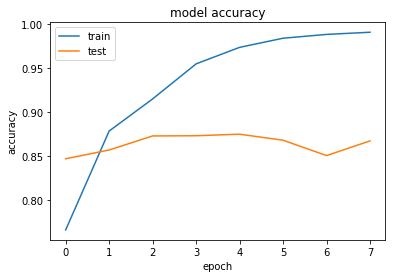

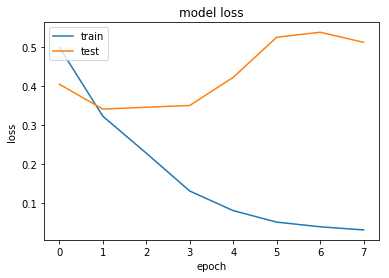

In [0]:
plot_lstm(history)

### test lstm

In [0]:
score = model.evaluate(X_test_pad, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

10000/10000 [==============================] - 5s 493us/step
Test Score: 0.5501279873669147
Test Accuracy: 0.8568
